## Importing Libraries

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

## Loading Maze Image into an Array

210 210


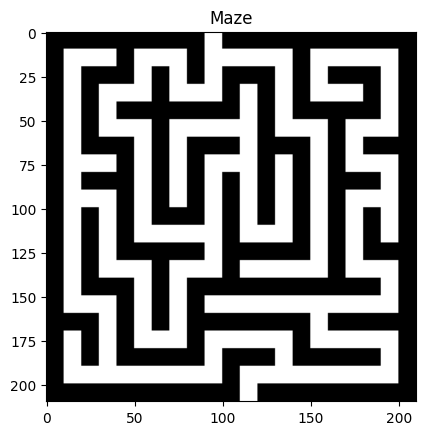

In [165]:
def load_maze():
    # Load the maze image
    img = Image.open('maze.jpg').convert('L')
    maze = np.array(img)

    # Convert to binary (0 for walls, 1 for open paths)
    maze = np.where(maze > 128, 1, 0)
    print(len(maze[0]),len(maze))
    # Display the maze
    plt.imshow(maze, cmap='gray')
    plt.title("Maze")
    plt.show()

    return maze

maze_orignal = load_maze()


### Simplified Maze by reducing the Size of Maze Matrix

In [166]:
#
maze_simplified=[]
t=0
for i in range(0,len(maze_orignal),10):
    maze_simplified.append([])
    for j in range(0,len(maze_orignal[0]),10):
        maze_simplified[t].append(maze_orignal[i][j])
    t+=1
print(len(maze_simplified),len(maze_simplified[0]))

21 21


In [167]:
maze_simplified

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
 [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
 [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 1,

### Defining Valid Directions, Moves, Entrance and Exit Point

In [168]:
# Define directions: up, down, left, right
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

start = (0, 9)  # Entrance position
end = (20, 11)  # Exit position

def is_valid_move(maze, pos):
    """Check if the position is within bounds and not a wall."""
    x, y = pos
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] == 1

### Defining Function for Visualizing the Results

In [169]:
def visualize_maze(maze, path):
    """Visualizes the maze and the path found."""
    maze_copy = np.array(maze)
    for pos in path:
        maze_copy[pos[0], pos[1]] = 0.5  # Mark the path with a different color

    plt.imshow(maze_copy, cmap='gray')
    plt.title('Maze with Solution Path' if path else 'No Solution Found')
    plt.show()

### Las Vegas Algorithm

In [170]:
def solve_maze_las_vegas(maze, start, end, max_steps=400):
    """Solves the maze using a Las Vegas algorithm approach with a step limit."""
    path = [start]
    current_pos = start
    steps = 0

    while current_pos != end and steps < max_steps:
        # Randomly pick a valid move direction
        random.shuffle(DIRECTIONS)
        moved = False

        for direction in DIRECTIONS:
            next_pos = (current_pos[0] + direction[0], current_pos[1] + direction[1])

            if is_valid_move(maze, next_pos):
                path.append(next_pos)
                current_pos = next_pos
                maze[current_pos[0]][current_pos[1]] = 2  # Mark as visited
                moved = True
                break

        if not moved:  # No valid move found, backtrack
            path.pop()
            if not path:
                return False, []  # No solution
            current_pos = path[-1]

        steps += 1

    # If the exit was reached, return success
    if current_pos == end:
        return True, path
    else:
        return False, path


### Back Tracking Algorithm

In [171]:
def solve_maze_backtracking(maze, current_pos, end, path):
    """Solve the maze using the Backtracking approach."""
    if current_pos == end:
        return True  # Exit found

    x, y = current_pos
    maze[x][y] = 2  # Mark as visited
    path.append(current_pos)

    # Try all possible directions (up, down, left, right)
    for direction in DIRECTIONS:
        next_pos = (x + direction[0], y + direction[1])
        if is_valid_move(maze, next_pos):
            if solve_maze_backtracking(maze, next_pos, end, path):
                return True

    # Backtrack: undo the move if no solution found
    path.pop()
    maze[x][y] = 1  # Unmark this position
    return False


Welcome to Maze Solver !
Choose Algo for Solving Maze: 
1. Las Vegas Algorithm
2. Back Tracking Algorithm
 3. Exit
1
Exit found in 79 steps!


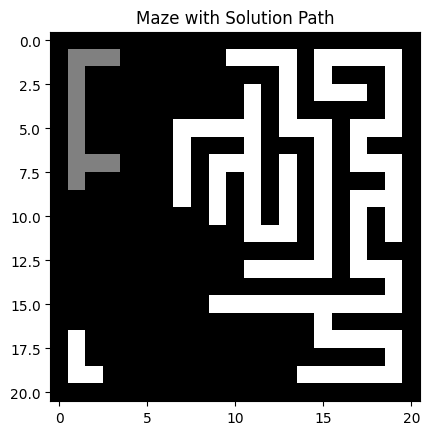

Welcome to Maze Solver !
Choose Algo for Solving Maze: 
1. Las Vegas Algorithm
2. Back Tracking Algorithm
 3. Exit
2
Exit found! Path: [(0, 9), (1, 9), (2, 9), (3, 9), (3, 8), (3, 7), (2, 7), (1, 7), (1, 6), (1, 5), (2, 5), (3, 5), (3, 4), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (12, 9), (13, 9), (13, 8), (13, 7), (14, 7), (15, 7), (16, 7), (17, 7), (17, 6), (17, 5), (16, 5), (15, 5), (14, 5), (13, 5), (13, 4), (13, 3), (12, 3), (11, 3), (10, 3), (9, 3), (9, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (15, 2), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8), (19, 9), (18, 9), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (18, 13), (19, 13), (19, 12), (19, 11)]


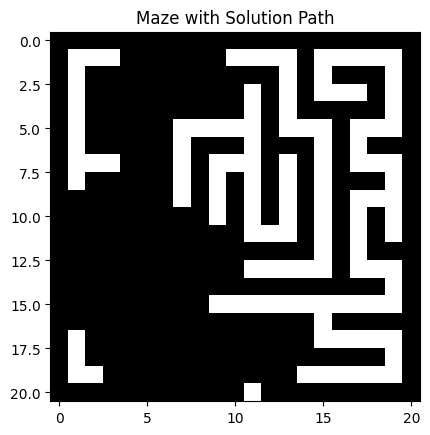

Welcome to Maze Solver !
Choose Algo for Solving Maze: 
1. Las Vegas Algorithm
2. Back Tracking Algorithm
 3. Exit
3


In [175]:
while True:
  print("Welcome to Maze Solver !")
  choice=int(input("Choose Algo for Solving Maze: \n1. Las Vegas Algorithm\n2. Back Tracking Algorithm\n 3. Exit\n"))
  if choice==1:
    maze_las_vegas=np.copy(maze_simplified)

    success, path = solve_maze_las_vegas(maze_las_vegas, start, end)
    if success:
        print(f"Exit found in {len(path)} steps!")
    else:
        print(f"Failed to find the exit within 400 steps.")
    visualize_maze(maze_las_vegas, path)
  elif choice==2:
    path = []
    maze_backtracking=np.copy(maze_simplified)
    if solve_maze_backtracking(maze_backtracking, start, end, path):
        print(f"Exit found! Path: {path}")
    else:
        print("No solution found.")
    visualize_maze(maze_backtracking, path)
  else:
    break


In [173]:
# Function to run multiple simulations
def run_simulations(maze, start, end, step_limit=400, runs=10000):
    backtracking_successes = 0
    las_vegas_successes = 0

    for _ in range(runs):
        # Reset maze for each run (deep copy)
        maze_copy = np.copy(maze)

        # Backtracking
        path_backtracking = []
        if solve_maze_backtracking(maze_copy, start, end, path_backtracking):
            backtracking_successes += 1

        # Reset maze for Las Vegas
        maze_copy = np.copy(maze)

        # Las Vegas
        if solve_maze_las_vegas(maze_copy, start, end, step_limit):
            las_vegas_successes += 1

    backtracking_success_rate = (backtracking_successes / runs) * 100
    las_vegas_success_rate = (las_vegas_successes / runs) * 100

    return backtracking_success_rate, las_vegas_success_rate

In [174]:
 # Run the simulations
backtracking_rate, las_vegas_rate = run_simulations(maze_simplified, start, end)

# Print success rates
print(f"Backtracking Success Rate: {backtracking_rate}%")
print(f"Las Vegas Success Rate: {las_vegas_rate}%")

Backtracking Success Rate: 100.0%
Las Vegas Success Rate: 100.0%
